In [1]:
import pickle

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, roc_curve

In [4]:
import math

In [5]:
print(os.listdir("D:\College Stuff\TY\ML\MP\Dataset\Pepper"))

['Bacterial_spot', 'Healthy']


In [6]:
SIZE = 256

In [7]:
pepper_images = []
pepper_labels = [] 
for directory_path in glob.glob("D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        pepper_images.append(img)
        pepper_labels.append(label)
for directory_path in glob.glob("D:\College Stuff\TY\ML\MP\Dataset\Pepper\Bacterial_spot"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        pepper_images.append(img)
        pepper_labels.append(label)

Healthy
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\00726ad4-2569-46ce-9d4e-dbf82b14bd94___JR_HL 8686.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\0119205b-cfac-4322-be37-dcc401fcfa11___JR_HL 8527.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\0137d804-551d-4f78-88b4-d603056dd7e7___JR_HL 7719.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\01468dda-44f3-4de8-8aed-948bcc29b719___JR_HL 8704.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\01482fdd-5dfd-4190-bbc0-6189a3161fae___JR_HL 7983.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\016c8a9f-8eab-41b2-bb4b-0eb6ed0b2a7d___JR_HL 8591.JPG
D:\College Stuff\TY\ML\MP\Dataset\Pepper\Healthy\016ed5ad-be29-4e

In [8]:
pepper_images = np.array(pepper_images)
pepper_labels = np.array(pepper_labels)

In [9]:
len(pepper_images), len(pepper_labels)

(2474, 2474)

In [10]:
#Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(pepper_images, pepper_labels, test_size=0.2, train_size=0.8, shuffle=True)

In [11]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
#data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
x_train_aug = []
for i in x_train:
    img = data_augmentation(i)
    x_train_aug.append(img)

In [15]:
x_train_aug = np.array(x_train_aug)

In [16]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [17]:
x_train_aug.shape

(1979, 256, 256, 3)

In [18]:
x_train_new = x_train_aug.reshape(1979, 256*256*3)

In [19]:
x_train_aug.shape, x_train_new.shape

((1979, 256, 256, 3), (1979, 196608))

In [20]:
# Train the model on training data
RF_model.fit(x_train_new, y_train_encoded)

RandomForestClassifier(n_estimators=50, random_state=42)

In [21]:
x_test.shape

(495, 256, 256, 3)

In [22]:
x_test_new = x_test.reshape(495, 256*256*3)

In [23]:
x_test_new.shape

(495, 196608)

In [24]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [25]:
#Print overall accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_RF)
print ("Accuracy = ", accuracy)

Accuracy =  0.8686868686868687


In [26]:
y_test.shape, prediction_RF.shape

((495,), (495,))

<AxesSubplot:>

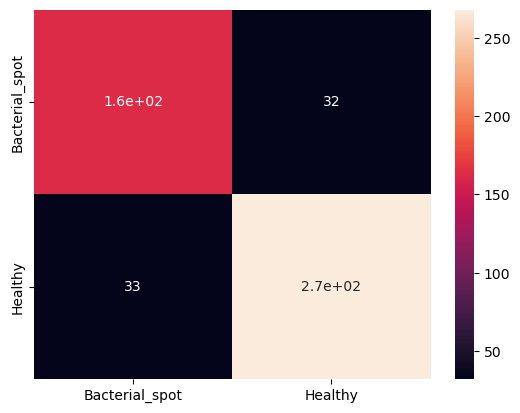

In [27]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
labels = ['Bacterial_spot', 'Healthy']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [28]:
cm

array([[162,  32],
       [ 33, 268]], dtype=int64)

The prediction for this image is:  ['Healthy']
The actual label for this image is:  Healthy
Label: 1


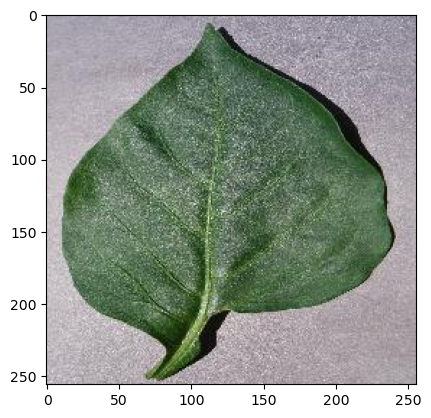

In [29]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=77 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction_RF2 = RF_model.predict(x_test_new)[0] 
label = prediction_RF2
prediction_RF2 = le.inverse_transform([prediction_RF2])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF2)
print("The actual label for this image is: ", y_test[n])
print("Label:", label)

In [30]:
le.fit(y_test)
y_test_trans = le.transform(y_test)
le.fit(prediction_RF)
predRF_trans = le.transform(prediction_RF)

In [31]:
y_test_trans, predRF_trans

(array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 

In [32]:
precision_logreg = precision_score(y_test_trans, predRF_trans, average = "macro")
accuracy_logreg = accuracy_score(y_test_trans, predRF_trans)
recall_logreg = recall_score(y_test_trans, predRF_trans, average = "macro")
f1_logreg = f1_score(y_test_trans, predRF_trans, average = "macro")
mse_logreg = mean_squared_error(y_test_trans, predRF_trans)
rmse_logreg = math.sqrt(mse_logreg)

In [33]:
print(
    "Precision score: ", precision_logreg,"\n",
    "Accuracy score: ", accuracy_logreg,"\n",
    "Recall score: ", recall_logreg,"\n",
    "F-1 score: ", f1_logreg,"\n",
    "Mean Squared Error: ", mse_logreg,"\n",
    "Root mean squared error: ", rmse_logreg
)

Precision score:  0.862051282051282 
 Accuracy score:  0.8686868686868687 
 Recall score:  0.862708497448368 
 F-1 score:  0.8623759030578855 
 Mean Squared Error:  0.13131313131313133 
 Root mean squared error:  0.36237153766973934


In [34]:
filename = "D:\College Stuff\TY\ML\MP\Main\Models\pepper_rf.pickle"

# save model
pickle.dump(RF_model, open(filename, "wb"))

# load model
# loaded_model = pickle.load(open(filename, "rb"))